##   Author:  Niall Mullane
###     PID:  99S380224
##   Class:  PH412, Spring, 2018                                          
###     Helpers:  Meekhel Patel

##  Program:  Looking for periodicity                                    
###     Due Date:  April 18, 2019                                               
###     Language:  Python 3                 
###     IDE:  Jupyter     

##  Purpose:  Plotting various data and looking for periodicity of it       
##   "Bugs":  No major problems  


[[1.000000e+00 3.799269e+03]
 [2.000000e+00 3.800144e+03]
 [3.000000e+00 3.801019e+03]
 ...
 [3.850000e+03 9.217221e+03]
 [3.851000e+03 9.219344e+03]
 [3.852000e+03 9.221467e+03]]


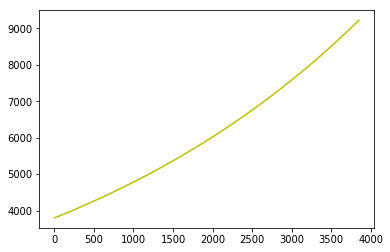

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#Load data file as str
data = np.loadtxt("star_wavelength.csv", str)
#My file had a slightly corrupted first cell so manually fixing that here
data[0][0]="1"
#convert data to floats
data = data.astype("float")

#plot the data
x, y = data[:,0], data[:,1]
plt.plot(x,y,"y")
plt.show()

The graph shows just an exponential curve and does not show any periodic behavior

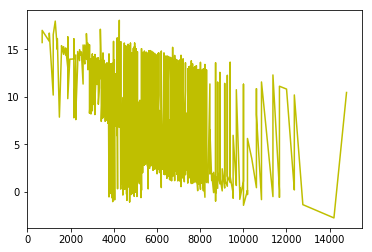

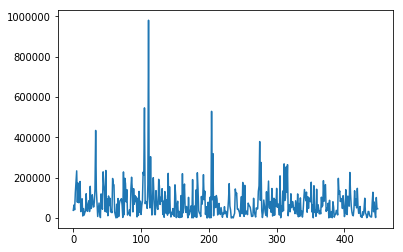

In [21]:
import numpy as np
import matplotlib.pyplot as plt

#Load data as float
data = np.loadtxt("stars.txt", float)

#Extract x and y values
x, y = data[:,0], data[:,1]
#Plot the data
plt.plot(x,y,"y")
#Show the graph
plt.show()

#Perform fast fourier transform on the data
c = np.fft.rfft(y)
#Plot the fft starting from 50ish to remove original spike
plt.plot(abs(c[50:500])**2)
#Show the plot
plt.show()



The data does exhibit periodic behavior with a significant frequency of approximately 110 1/s

(663, 676)
(663, 676)
(663, 676)

(663, 339)
(663, 339)
(663, 339)
(663, 339)


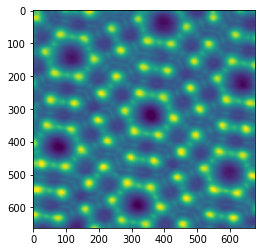

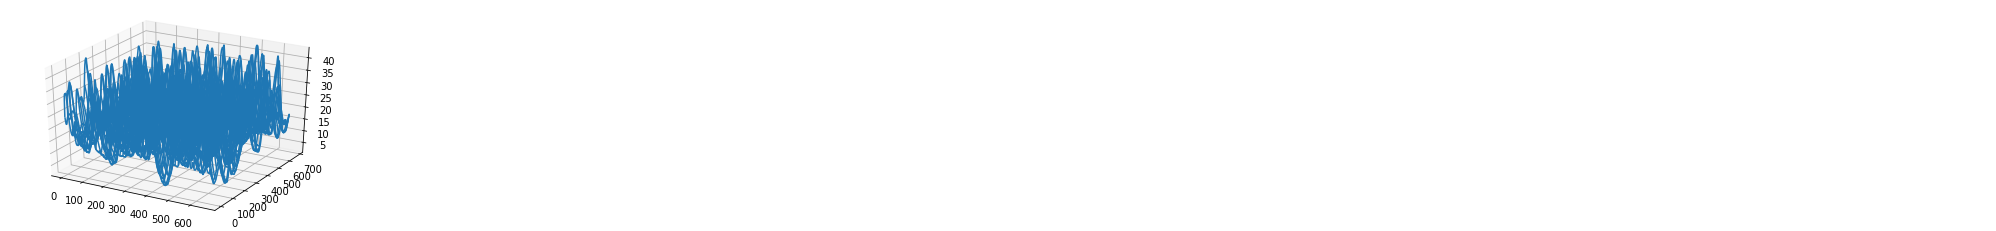

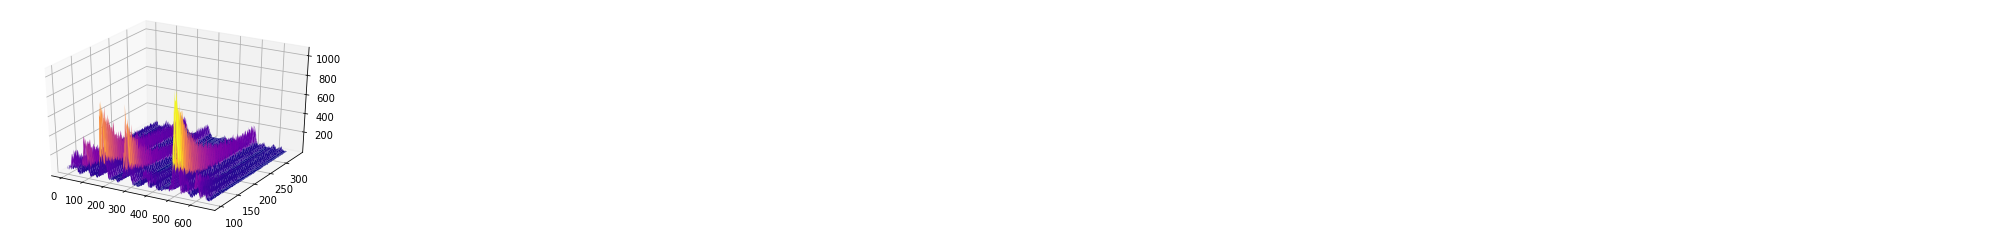

In [73]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("stm.txt", float)


from mpl_toolkits.mplot3d import Axes3D

#Show the data as a heatmap image
plt.imshow(data)

#Convert the data to 3d mesh
fig = plt.figure()  #Create new mpl figure
shape = data.shape  #Extract the shape of the data

xs = np.arange(shape[0])  #Create x and y helper variables to determine the size of the required mesh
ys = np.arange(shape[1])
mesh = np.meshgrid(ys, xs) #Create a 2d mesh of simple x,y values to accompany z values in the data

ax = fig.add_subplot(111, projection='3d')  #Add an axes to the figure

print(data.shape)
print(mesh[1].shape)
print(mesh[0].shape)
print("")
ax.plot_wireframe(mesh[1], mesh[0], data)   #Plot a wireframe mesh using the created mesh and z data


#Compute fft on the 2d data
c = np.fft.rfft(data)

#Create a new figure
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')

#Check the shape of the fft
print(c.shape)
#Create a meshgrid based off of the dimensions of the fft
mesh = np.meshgrid(np.arange(c.shape[1]), np.arange(c.shape[0]))

#Check the dimensions of the meshgrid
print(np.power(np.absolute(c),2).shape)
print(mesh[1].shape)
print(mesh[0].shape)
#Plot the fft as a surface instead of a meshgrid for better color and visualization
ax1.plot_surface(mesh[1][:,100:-1], mesh[0][:,100:-1], np.power(np.absolute(c),2)[:,100:-1], cmap="plasma")

plt.show()


Even though this graph is 3D, the fourier transform did work and we could definitely find the frequency of waves in this data

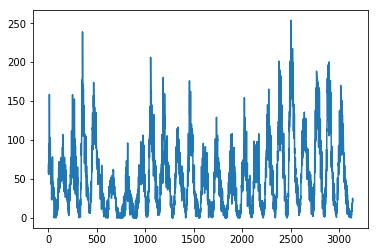

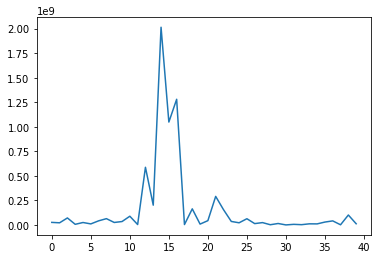

In [75]:
import numpy as np
import matplotlib.pyplot as plt

#Load data
data = np.loadtxt("sunspots.txt", float)

#Extract x and y data
x, y = data[:,0],data[:,1]

#Plot the data
plt.plot(x,y)
plt.show()

#Compute fft
c = np.fft.rfft(y)
#Plot specific section of the data to highlight significant frequency
plt.plot(abs(c[10:50])**2)
plt.show()

This graph shows significant periodicity with a significant spike around 15 1/s

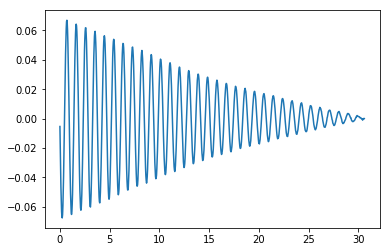

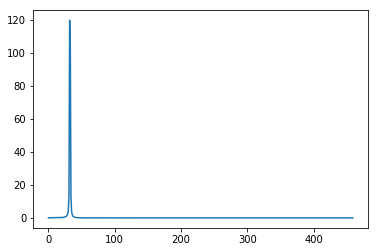

In [76]:
import numpy as np
import matplotlib.pyplot as plt

#Load data with comma as delimiter as it is a csv
data = np.loadtxt("damped_oscillation.csv", dtype = float, delimiter=",")

#Extract x and y data
x, y = data[:,0],data[:,1]

#Plot the data
plt.plot(x,y)
plt.show()

#Compute fft
c = np.fft.rfft(y)
#Plot specific section of the data to highlight significant frequency
plt.plot(abs(c)**2)
plt.show()

This graph is a damping oscillation with a single frequency. Thus the fourier transform shows one major spike

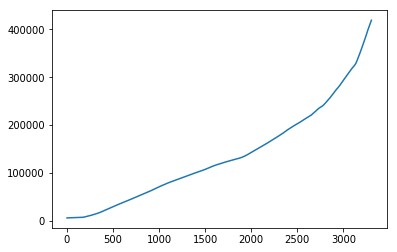

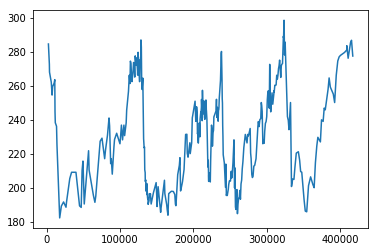

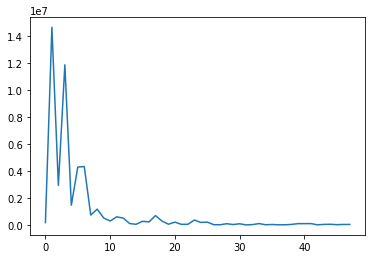

In [84]:
import numpy as np
from numpy.fft import rfft
import matplotlib.pyplot as plt

#Load data as str
data = np.loadtxt("Vostok Ice Core Problems.txt", str)
data[0][0] = 1   #Remove encoding error
data = data.astype("float")#Conver back to float


#Extract depth and age of ice data
x = data[:,0]
y = data[:,1]

plt.plot(x,y)
plt.show()

#Extract age of air and CO2 concentration
x = data[:,2]
y = data[:,3]

plt.plot(x,y)
plt.show()

c = rfft(y)
plt.plot(abs(c[2:50])**2)
plt.show()

There is a positive correlation between the age and depth of the ice, which makes sense, since lower layers are going to be older and there is no periodicity in this data. On the other hand the age and CO2 concentration does seem to have a periodic relationship which is confirmed by the significant spikes in the fft.

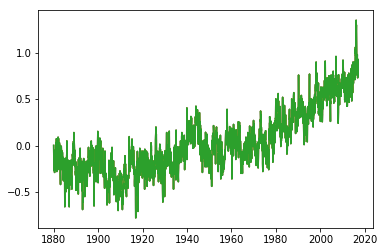

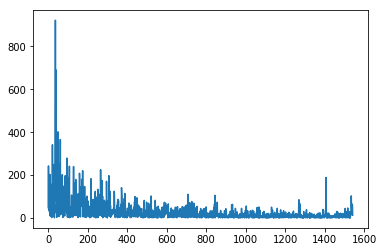

In [25]:
import numpy as np
import matplotlib.pyplot as plt

#Load data with comma as delimeter
data = np.loadtxt("monthly_csv.csv", dtype = str, delimiter=",")
#Ignore first entry in the data and extract x and y data
data = data[1:-1]

x1 = data[:,1]
y1 = data[:,2]

x = []
y = []
  
#Extract the different time entries
for i in x1:
    x.append(i.split("-"))
    

#Convert all time entries to float
x = np.array(x).astype("float")

for i in range(len(x)):
    x[i] = x[i][0]+(x[i][1]-1)/12+x[i][2]/30/12
    
for i in y1:
    y.append(float(i))


plt.plot(x,y)
plt.show()

c = np.fft.rfft(y)
plt.plot(abs(c[100:-1])**2)
plt.show()


These temperatures over time do in fact have a significant oscillation as shown in the fft which makes sense because of the seasons, and it is also increasing over time because of global warming.

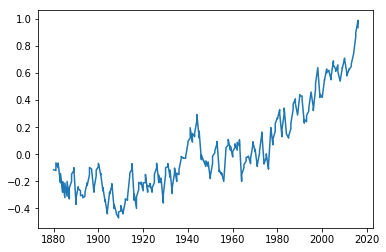

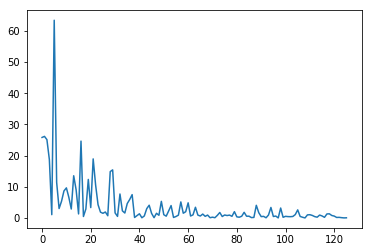

In [30]:
import numpy as np
import matplotlib.pyplot as plt

#Load data with comma as delimeter
data = np.loadtxt("annual_csv.csv", dtype = str, delimiter=",")
#Ignore first entry in the data and extract x and y data
data = data[1:-1]
x1 = data[:,1]
y1 = data[:,2]

x = np.array(x1).astype("float")
y = np.array(y1).astype("float")

plt.plot(x,y)
plt.show()

c = np.fft.rfft(y)
plt.plot(abs(c[10:-1])**2)
plt.show()


The yearly temperatures over time have a significant oscillation as before, and because it has a lot less data than the daily temperatures the oscillations are a lot clearer than before.